<a href="https://colab.research.google.com/github/ryanharvey1/teamA-grebes-NMA2020/blob/master/speed_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Find running calcium response correlations

In [51]:
import matplotlib.pyplot as plt
import sys


download data

TODO: make general for wider dataset

In [1]:
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

import numpy as np
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())        

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


get correlation

In [44]:
def compute_speed_mod(speed,fr):

  # get speed score
  speed_score = np.corrcoef(speed,fr)[0,1]

  return speed_score

get shuffled pvalue

In [45]:
def shuffle_speed_mod(speed_score,speed,fr,shuffn=1000):

  # Each cell’s fr vector was shuffled by a random interval from ~20 s before its true
  a = -20;
  b = 20; 
  r = np.random.random_integers(a,b,shuffn)

  speed_score_shuff = []
  for i in range(len(r)):
    sc = compute_speed_mod(speed,np.roll(fr,r[i]))
    speed_score_shuff.append(sc)
 
  # DOI: 10.2202/1544-6115.1585
  shuff_pvalue = (sum(np.abs(speed_score_shuff) > np.abs(speed_score)) + 1) /(len(speed_score_shuff) + 1);

  return shuff_pvalue

run though every cell

In [ ]:
cells,time = dat['sresp'].shape

speed_score = []
shuff_pvalue = []
for i in range(cells):
  r = compute_speed_mod(np.squeeze(dat['run']),dat['sresp'][i,:])
  speed_score.append(r)
  shuff_pvalue.append(shuffle_speed_mod(r,np.squeeze(dat['run']),dat['sresp'][i,:]))
  sys.stdout.write('\rcurrent cell: %d' %i)
  sys.stdout.flush()

# print(speed_score)
# print(shuff_pvalue)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(-20, 20 + 1) instead
  


current cell: 449

[0.054916915081914916, -0.011550959079188714, -0.011674711590923127, 0.0460781905924824, 0.04810677195788018, -0.036850124057974366, -0.1406466767211703, 0.012253475620826657, -0.021389524916357296, -0.008724068178057336, 0.4254731289524843, -0.0767475793943968, -0.019145789458833752, -0.003920746235234735, 0.0173947565883392, 0.004796183428119077, -0.0325664350714746, -0.06834080876398367, 0.09541973772816739, 0.04590993401390704, 0.14394490447252742, -0.015342330761638621, 9.929147472811085e-05, -0.03199263946232978, -0.0035154479207517644, 0.03931525062423476, -0.017996095494196784, -0.015032058027464823, -0.013785601097830853, 0.07137433722638584, 0.2820502264063018, 0.08029088212465024, -0.06701839221563224, -0.0023612659434514905, -0.08027861921757275, -0.002382709080226189, -0.009592923979357307, -0.014143726205426208, -0.005657402929201755, -0.006979124226807693, 0.018966260776611024, -0.010184931784935142, -0.029212845256063016, 0.048480710767040344, -0.046906477441782335, 0.0

ValueError: ignored

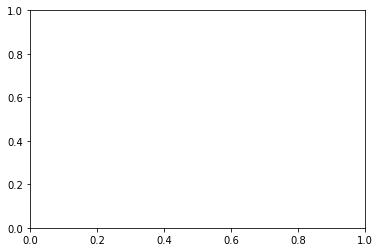

In [57]:
print(speed_score)
plt.scatter(shuff_pvalue,speed_score)